# Traveling Salesman Lösungen

### Universität der Bundeswehr München - Prof. Dr. Claudius Steinhardt - Logistics Analytics
Erstellt von Sebastian Knall am 30.05.2022

Dieses Notebook stellt die Nearest Neighbour Lösung des TS-Problems grafisch dar.

In [1]:
import math
import random
import matplotlib.pyplot as plt
%matplotlib notebook


class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        return math.hypot(self.x - city.x, self.y - city.y)

    def __repr__(self):
        return f"({self.x}, {self.y})"


def read_cities(size):
    cities = []
    with open(f'test_data/cities_{size}.data', 'r') as handle:
        lines = handle.readlines()
        for line in lines:
            x, y = map(float, line.split())
            cities.append(City(x, y))
    return cities


def write_cities_and_return_them(size):
    cities = generate_cities(size)
    with open(f'test_data/cities_{size}.data', 'w+') as handle:
        for city in cities:
            handle.write(f'{city.x} {city.y}\n')
    return cities


def generate_cities(size):
    return [City(x=int(random.random() * 1000), y=int(random.random() * 1000)) for _ in range(size)]


def path_cost(route):
    return sum([city.distance(route[index - 1]) for index, city in enumerate(route)])


<IPython.core.display.Javascript object>


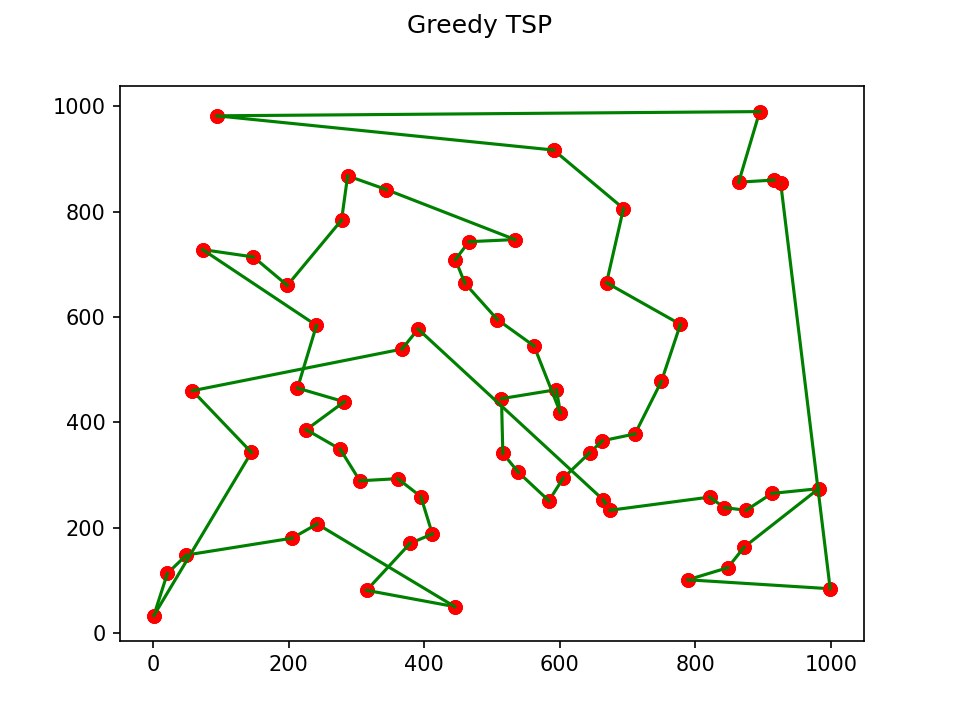

8335.26492773339
[(591.0, 917.0), (694.0, 806.0), (669.0, 665.0), (778.0, 586.0), (750.0, 478.0), (711.0, 378.0), (663.0, 365.0), (644.0, 342.0), (605.0, 294.0), (584.0, 251.0), (539.0, 305.0), (516.0, 341.0), (514.0, 445.0), (595.0, 462.0), (601.0, 418.0), (562.0, 545.0), (508.0, 595.0), (460.0, 664.0), (446.0, 709.0), (466.0, 743.0), (534.0, 747.0), (344.0, 842.0), (287.0, 868.0), (278.0, 784.0), (198.0, 660.0), (148.0, 714.0), (73.0, 728.0), (241.0, 584.0), (213.0, 465.0), (282.0, 439.0), (226.0, 386.0), (276.0, 349.0), (305.0, 289.0), (361.0, 293.0), (395.0, 259.0), (412.0, 188.0), (379.0, 170.0), (315.0, 81.0), (445.0, 50.0), (242.0, 207.0), (205.0, 180.0), (49.0, 148.0), (21.0, 113.0), (1.0, 33.0), (145.0, 343.0), (58.0, 460.0), (367.0, 539.0), (391.0, 577.0), (664.0, 253.0), (674.0, 233.0), (821.0, 258.0), (843.0, 238.0), (875.0, 233.0), (913.0, 265.0), (982.0, 274.0), (872.0, 163.0), (848.0, 124.0), (789.0, 101.0), (999.0, 84.0), (926.0, 854.0), (916.0, 860.0), (864.0, 856.0), 

In [2]:
class Greedy:
    def __init__(self, cities):
        self.unvisited = cities[1:]
        self.route = [cities[0]]

    def run(self, plot):
        if plot:
            plt.show(block=False)
            self.init_plot()
        while len(self.unvisited):
            index, nearest_city = min(enumerate(self.unvisited),
                                      key=lambda item: item[1].distance(self.route[-1]))
            self.route.append(nearest_city)
            del self.unvisited[index]
            self.plot_interactive(False)
        self.route.append(self.route[0])
        self.plot_interactive(False)
        self.route.pop()
        return path_cost(self.route)



    def init_plot(self):
        fig = plt.figure(0)
        fig.suptitle('Greedy TSP')
        x_list, y_list = [], []
        for city in [*self.route, *self.unvisited]:
            x_list.append(city.x)
            y_list.append(city.y)
        x_list.append(self.route[0].x)
        y_list.append(self.route[0].y)

        plt.plot(x_list, y_list, 'ro')
        fig.canvas.draw()
        
    def plot_interactive(self, block):
        fig = plt.figure(0)
        x1, y1, x2, y2 = self.route[-2].x, self.route[-2].y, self.route[-1].x, self.route[-1].y
        plt.plot([x1, x2], [y1, y2], 'ro')
        plt.plot([x1, x2], [y1, y2], 'g')
        plt.draw()
        plt.pause(0.1)
        fig.canvas.draw()



if __name__ == "__main__":
    cities = read_cities(64)
    greedy = Greedy(cities)
    
    print(greedy.run(plot=True))
    print(greedy.route)
    
    
